<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/notebook/practica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica primer parcial**
* ### **Grupo 4**

* ### **Integrantes**



>1.   Orellana Espinoza Elizabeth Margot
2.   Quiñones Vargas Jorge Mauricio
3.   Velasco Miranda Juan Pablo
4. Viza Contreras Maria Elena





# Dataset
El dataset asignado proporciona informacion sobre la salud y habitos de diversas personas, incluyendo


*   Enfermedad del corazon
*   Indice de masa corporal
*   Fuma
*   Consumo de alcohol
*   Actividad fisica
*   Raza
*   ....

Este dataset corresponde a la categoria de modelos de decision, considerando el target si una persona tiene o no enfermedades del corazon (HeartDisease); y como feture todas las demas columnas.



## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar, entre estos se tiene

  *  **Pandas**, para el manejo del dataset
  *  **Numpy**, para calculos matriciales
  *  **matplotlib** y seaborn, para la graficacion
  *  **sklearn**, para el proceso de entrenamiento y modelado
 <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [587]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression


#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


## **1. Cargar datos**

Los datos se cargan directamente desde el repositorio de Github

In [588]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/heart_cleaned.csv',encoding = "ISO-8859-1")

In [589]:
# Vamos visualizar los datos
data.head(11)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [590]:
#imputer = SimpleImputer(strategy="median")
#non_floats = []
#for col in data:
#    if data[col].dtypes != "float64":
#        non_floats.append(col)
#df_num = data.drop(columns=non_floats)
#df_num

In [591]:
#imputer.fit(df_num)
#X = imputer.transform(df_num)
#X
#housing_tr = pd.DataFrame(X, columns=df_num.columns,
#index=df_num.index)
#housing_tr

## **2. Limpiar datos**

Los datos no contiene datos vacios (null)

In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## **3. Codificar datos**

Se debe convertir las variables categoricas (no numericas) a numericas

In [593]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [594]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [595]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

HeartDisease: 2 labels
Smoking: 2 labels
AlcoholDrinking: 2 labels
Stroke: 2 labels
DiffWalking: 2 labels
Sex: 2 labels
AgeCategory: 13 labels
Race: 6 labels
Diabetic: 4 labels
PhysicalActivity: 2 labels
GenHealth: 5 labels
Asthma: 2 labels
KidneyDisease: 2 labels
SkinCancer: 2 labels


In [596]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [597]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [598]:
col_cat_con(col_categorical,data)
data.head(15)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


# Correlacion de Pearson
La correlacion de pearson indica la relacion entre variables continuas o numericas, la relacion es un valor de -1 a 1 donde 1 significa una correlacion perfecta. <br>
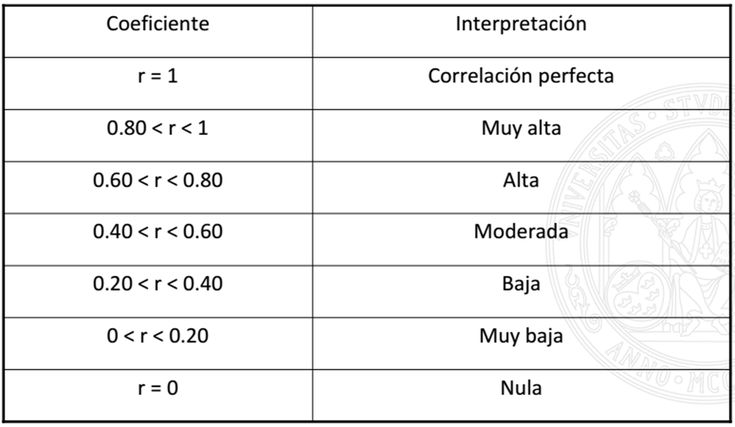

In [599]:
data.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


La variable que nos interesa es el target (y), que en nuestro caso es "HeartDisease". Verificamos la correlacion para decidir que columnas utilizar y cuales eliminar

In [600]:
data.corr()['HeartDisease']

HeartDisease        1.000000
BMI                 0.051803
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
Sex                 0.070040
AgeCategory         0.233432
Race                0.034854
Diabetic            0.168553
PhysicalActivity   -0.100030
GenHealth          -0.011062
SleepTime           0.008327
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
Name: HeartDisease, dtype: float64

Se elimina las columnas con una correlacion baja

In [601]:
data.drop(['AlcoholDrinking', 'MentalHealth', 'PhysicalActivity', 'Sex', 'Race', 'SleepTime', 'Asthma', 'SkinCancer'], axis=1, inplace=True)
data.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,GenHealth,KidneyDisease
0,0,16.60,1,0,3.0,0,7,2,4,0
1,0,20.34,0,1,0.0,0,12,0,4,0
2,0,26.58,1,0,20.0,0,9,2,1,0
3,0,24.21,0,0,0.0,0,11,0,2,0
4,0,23.71,0,0,28.0,1,4,0,4,0


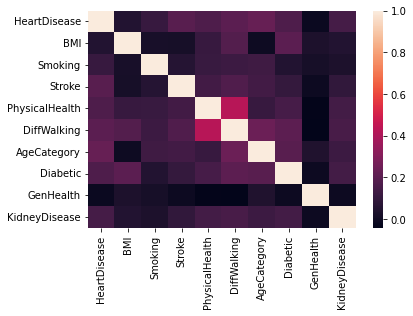

In [602]:
sns.heatmap(data.corr())
plt.show()

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Regresion logistica**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




Se debe separar el target del resto de los datos (features)

In [603]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [604]:
x

,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,GenHealth,KidneyDisease
0,16.60,1,0,3.0,0,7,2,4,0
1,20.34,0,1,0.0,0,12,0,4,0
2,26.58,1,0,20.0,0,9,2,1,0
3,24.21,0,0,0.0,0,11,0,2,0
4,23.71,0,0,28.0,1,4,0,4,0
...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,7.0,1,8,2,1,0
319791,29.84,1,0,0.0,0,3,0,4,0
319792,24.24,0,0,0.0,0,5,0,2,0
319793,32.81,0,0,0.0,0,1,0,2,0


In [605]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int8

# Oversampling y Undersampling

El numero de registros de las personas sin enfermedades cardiacas (0) es mucho mayor al de personas que si tienen enfermedades cardiacas (1). Por lo que se hace el oversampling.

* El oversampling incrementa el tamaño de la menor muestra a una igual o proporcional a la de mayor tamaño. 
* Mientras que el undersampling elimina filas del que tenga mayor cantidad de datos

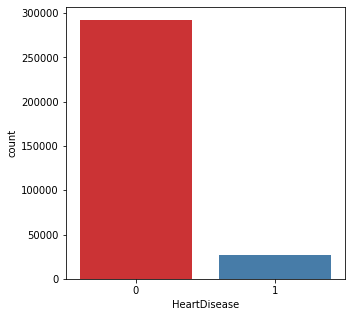

In [606]:
#Mostramos la cantidad de personas que tienen o no una enfermedad del corazon
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="HeartDisease", data=data, palette="Set1")
plt.show()

In [607]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [608]:
'''oversample = RandomOverSampler(sampling_strategy="minority")
x, y = oversample.fit_resample(x, y)'''
undersample = RandomUnderSampler(sampling_strategy=0.3)
x, y = undersample.fit_resample(x, y)

In [609]:
x.value_counts()

BMI    Smoking  Stroke  PhysicalHealth  DiffWalking  AgeCategory  Diabetic  GenHealth  KidneyDisease
26.63  0        0       0.0             0            9            0         4          0                32
24.41  0        0       0.0             0            0            0         0          0                30
27.46  0        0       0.0             0            8            0         4          0                21
                                                     9            0         4          0                21
27.44  0        0       0.0             0            6            0         4          0                20
                                                                                                        ..
26.04  1        0       0.0             0            5            0         4          0                 1
                                                                            2          0                 1
                                           

In [610]:
y.value_counts()

0    91243
1    27373
Name: HeartDisease, dtype: int64

Se divide el conjunto de datos en dos
* **Datos de entrenamiento**, que seran un tercio de los datos totales
* **Datos de prueba**, que seran dos tercios de los datos totales

In [611]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11, stratify=y)

In [612]:
y_train.value_counts(normalize=True)*100

0    76.92269
1    23.07731
Name: HeartDisease, dtype: float64

In [613]:
y_test.value_counts(normalize=True)*100

0    76.923666
1    23.076334
Name: HeartDisease, dtype: float64


* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


El modelo se entrenara con la regresion logistica

In [614]:
logistic = LogisticRegression(max_iter=5000, random_state=11)

In [615]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=11)

In [616]:
y_pred = logistic.predict(x_test)

In [617]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %s" % "{0:.3%}".format(accuracy))

Accuracy: 80.063%


In [618]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %s" % "{0:.3%}".format(precision))

Precision: 62.880%


# Metricas de clasificacion


0.   Matriz de confusion. Una matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado.  Nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.



In [619]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Sanos del corazon', 1:'Enfermos del corazon'}, index={0:'Sanos del corazon', 1:'Enfermos del corazon'}, inplace=True)
df_cm

,Sanos del corazon,Enfermos del corazon
Sanos del corazon,28340,1771
Enfermos del corazon,6033,3000


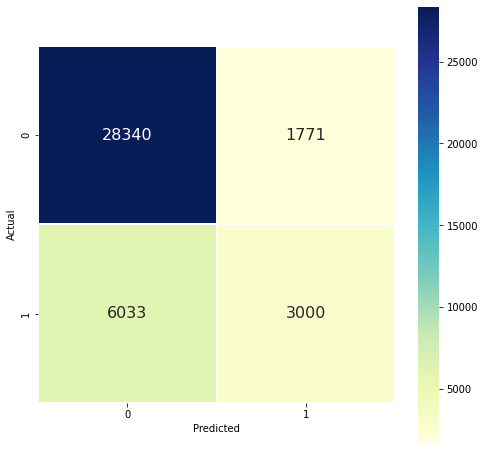

In [620]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

La matriz de clasificacion indica los siguientes valores:
* P: Positivo, indicando el número de casos reales positivos en los datos
* N: Negativo, indicando el número de casos reales negativos en los datos
* TP: True positive (positivo real), indica el numero de casos positivos
que son clasificados correctamente por el clasificador
* TN: True Negative (negativo real), indica el numero de casos negativos
que son clasificados correctamente por el clasificador
* FP: Falso Positivo, indica el número de casos positivos que son clasificados incorrectamente por el clasificador
* FP: Falso Negativo, indica el número de casos negativos que son clasificados incorrectamente por el
clasificador

In [621]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [622]:
print('\nPositives(P) = ', P)
print('\nNegatives(N) = ', N)
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalsos Positives(FP) = ', FP)

print('\nFalsos Negatives(FN) = ', FN)


Positives(P) =  34373

Negatives(N) =  4771

True Positives(TP) =  28340

True Negatives(TN) =  3000

Falsos Positives(FP) =  1771

Falsos Negatives(FN) =  6033


1. Exactitud. Se refiere a lo cerca que está el resultado de una medición del valor verdadero <br>
TP + TN / TP + TN + FP + FN

In [630]:
exac= (TP + TN) / (TP + TN + FP + FN)
print("Exactitud = "+str(exac*100)+"%")

Exactitud = 80.06335581442877%


2. Precision. Se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud <br>
TP / TP + FP


In [633]:
pre = TP / (TP + FP)
print("Precision = "+str(pre*100)+"%")

Precision = 94.1184284812859%


3. Sensibilidad. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. <br>
TP / (TP + FN)

In [634]:
sensibilidad = TP / (TP + FN)
print("Sensibilidad = "+str(sensibilidad*100)+"%")

Sensibilidad = 82.4484333633957%


4. Especificidad. Se trata de los casos negativos que el algoritmo ha clasificado correctamente.  Expresa cuan bien puede el modelo detectar esa clase.<br>
TN / TN + FP

In [636]:
esp = TN / (TN + FP)
print("Tasa negativa real = "+str(esp*100)+"%")

Tasa negativa real = 62.87989939216098%


5. tasa de clasificación errónea. Representa la cantidad de clasificaciones incorrectas obtuvo el modelo.
FP + FN / TP + TN + FP + FN

In [639]:
tce = (FP + FN) / (TP + TN + FP + FN)
print("Tasa de clasificacion erronea = "+str(tce*100)+"%")

Tasa de clasificacion erronea = 19.93664418557122%


# Predicciones con datos ingresados

In [628]:
'''flag = True
while flag:
  try:
    smoking = int(input("\nUsted fuma? (0 para no 1 para si)"))
    stroke = int(input("Tuvo algun derrame cerebral? (0 para no 1 para si)"))
    physical_health = int(input("cual su nivel de salud fisica? (Entre 0 y 100"))
    diff_walking = int(input("Tiene dificultades para caminar? (0 para no 1 para si)"))

    age_category = int(input("Categoria de edad: mas de 80(12) 75-79(11) 70-74(10) \n 65-69(9) 60-64(8) 55-59(7)\n 50-54(6) 45-49(5) 40-44(4)\n35-39(3) 30-34(2) 25-29(1) 18-24(0)\n"))

    diabetic = int(input("Es diabetico? (0 para no 1 para si) 2 para casi diabetico" ))
    kidney_disease = int(input("Tiene alguna enfermedad renal? (0 para no 1 para si)"))

    if(0 <= smoking <= 1 and 0 <= stroke <= 1 and 0 <= physical_health <= 100 and 0 <= diff_walking <= 1 and 0 <= age_category <= 12 and 0 <= diabetic <= 1 and 0 <= kidney_disease <= 1):
      flag = False
    else:
      print("\nValores erroneos, intente de nuevo.")
  except:
    print("\nSolo se admiten numeros")

frame = {'Smoking': smoking,
            'Stroke': stroke,
            'PhysicalHealth': physical_health,
            'DiffWalking': diff_walking,
            'AgeCategory':age_category,
            'Diabetic': diabetic,
            'KidneyDisease':kidney_disease} 

features = pd.DataFrame(frame, index=[0])
prediction = logistic.predict(features)
if prediction == 0:
  print("\nPrediction: {}".format(prediction) + " No tiene una enfermedad del corazon")
else: 
  print("\nPrediction: {}".format(prediction) + " Tiene una enfermedad del corazon")'''

  
				



'flag = True\nwhile flag:\n  try:\n    smoking = int(input("\nUsted fuma? (0 para no 1 para si)"))\n    stroke = int(input("Tuvo algun derrame cerebral? (0 para no 1 para si)"))\n    physical_health = int(input("cual su nivel de salud fisica? (Entre 0 y 100"))\n    diff_walking = int(input("Tiene dificultades para caminar? (0 para no 1 para si)"))\n\n    age_category = int(input("Categoria de edad: mas de 80(12) 75-79(11) 70-74(10) \n 65-69(9) 60-64(8) 55-59(7)\n 50-54(6) 45-49(5) 40-44(4)\n35-39(3) 30-34(2) 25-29(1) 18-24(0)\n"))\n\n    diabetic = int(input("Es diabetico? (0 para no 1 para si) 2 para casi diabetico" ))\n    kidney_disease = int(input("Tiene alguna enfermedad renal? (0 para no 1 para si)"))\n\n    if(0 <= smoking <= 1 and 0 <= stroke <= 1 and 0 <= physical_health <= 100 and 0 <= diff_walking <= 1 and 0 <= age_category <= 12 and 0 <= diabetic <= 1 and 0 <= kidney_disease <= 1):\n      flag = False\n    else:\n      print("\nValores erroneos, intente de nuevo.")\n  excep

# Arbol de clasificacion/Maquina de vectores

reutilizacion de datos ya procesados anteriormente para regresion logistica


In [629]:
data.head(10)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,GenHealth,KidneyDisease
0,0,16.60,1,0,3.0,0,7,2,4,0
1,0,20.34,0,1,0.0,0,12,0,4,0
2,0,26.58,1,0,20.0,0,9,2,1,0
3,0,24.21,0,0,0.0,0,11,0,2,0
4,0,23.71,0,0,28.0,1,4,0,4,0
5,1,28.87,1,0,6.0,1,11,0,1,0
6,0,21.63,0,0,15.0,0,10,0,1,0
7,0,31.64,1,0,5.0,1,12,2,2,0
8,0,26.45,0,0,0.0,0,12,1,1,1
9,0,40.69,0,0,0.0,1,9,0,2,0
